In [18]:
import numpy as np
import json
import matplotlib.pyplot as plt
import scipy.signal as signal
import pickle
from PIL import Image

plt.rcParams['font.sans-serif']=['SimSun'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

def smooth(data):
    # tmp = scipy.signal.savgol_filter(data, 53, 3)
    tmp = signal.savgol_filter(data, 99, 3)
    return tmp

[-0.01976424 -0.01793768 -0.02000466 -0.01785365 -0.01534999 -0.01354503
 -0.01516482 -0.0188064  -0.01919718 -0.01885675 -0.01107625 -0.02030611
 -0.01762493 -0.0098184  -0.01823978 -0.02128854 -0.01928727 -0.02121853
 -0.01986516 -0.01974261 -0.02183995 -0.01411226 -0.01456741 -0.01251308
 -0.01654144 -0.01463619 -0.01316108 -0.01427085 -0.01865727 -0.01656981
 -0.01870896 -0.01965568 -0.01935172 -0.02022666 -0.0187956  -0.01887874
 -0.01853139 -0.01988111 -0.01948341 -0.01947448]
500
20000
20000
20000
20000


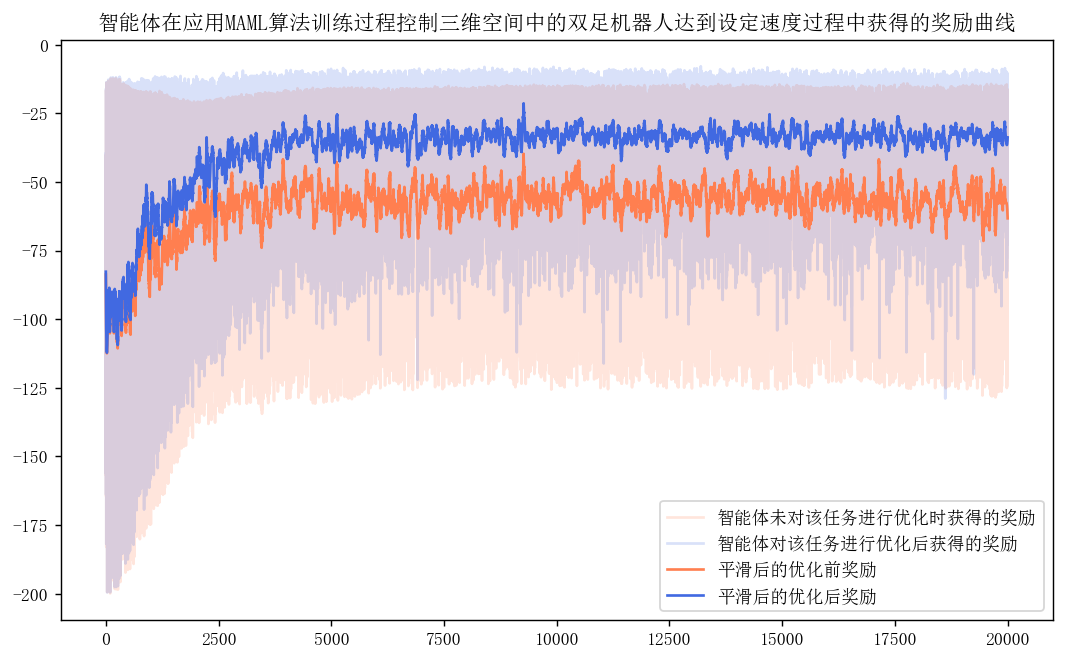

In [11]:
file = 'history.pkl'

with open(file, 'rb')as f:
    hist = pickle.load(f)
    
print (hist[0]['loss_after'])

batch_num = len(hist.keys())
print (batch_num)

loss_before = []
loss_after = []
train_returns = []
valid_returns = []

for i in range(batch_num):
    batch_data = hist[i]
    tr_returns = [np.sum(task)/20 for task in batch_data['train_returns']]
    train_returns.extend(tr_returns)
    
    val_returns = [np.sum(task)/20 for task in batch_data['valid_returns']]
    valid_returns.extend(val_returns)
    
    loss_bef = [np.mean(task) for task in batch_data['loss_before']]
    loss_before.extend(loss_bef)
    
    loss_aft = [np.mean(task) for task in batch_data['loss_after']]
    loss_after.extend(loss_aft)
print (len(train_returns))
print (len(valid_returns))

print (len(loss_before))
print (len(loss_after))

smooth_tra_returns = smooth(train_returns)
smooth_val_returns = smooth(valid_returns)

smooth_loss_bef = smooth(loss_before)
smooth_loss_aft = smooth(loss_after)

fig = plt.figure(dpi=128, figsize=(10,6))
plt.title('智能体在应用MAML算法训练过程控制三维空间中的双足机器人达到设定速度过程中获得的奖励曲线')
plt.plot(train_returns, alpha=0.2, color='coral', label='智能体未对该任务进行优化时获得的奖励')
plt.plot(valid_returns, alpha=0.2, color='royalblue',label='智能体对该任务进行优化后获得的奖励')
plt.plot(smooth_tra_returns, color='coral', label='平滑后的优化前奖励')
plt.plot(smooth_val_returns, color='royalblue', label='平滑后的优化后奖励')
plt.legend(loc='lower right')
plt.savefig('train-process-rewards.jpg')
plt.show()

img = Image.open('train-process-rewards.jpg')
img.save('train-process-rewards.eps')



10000


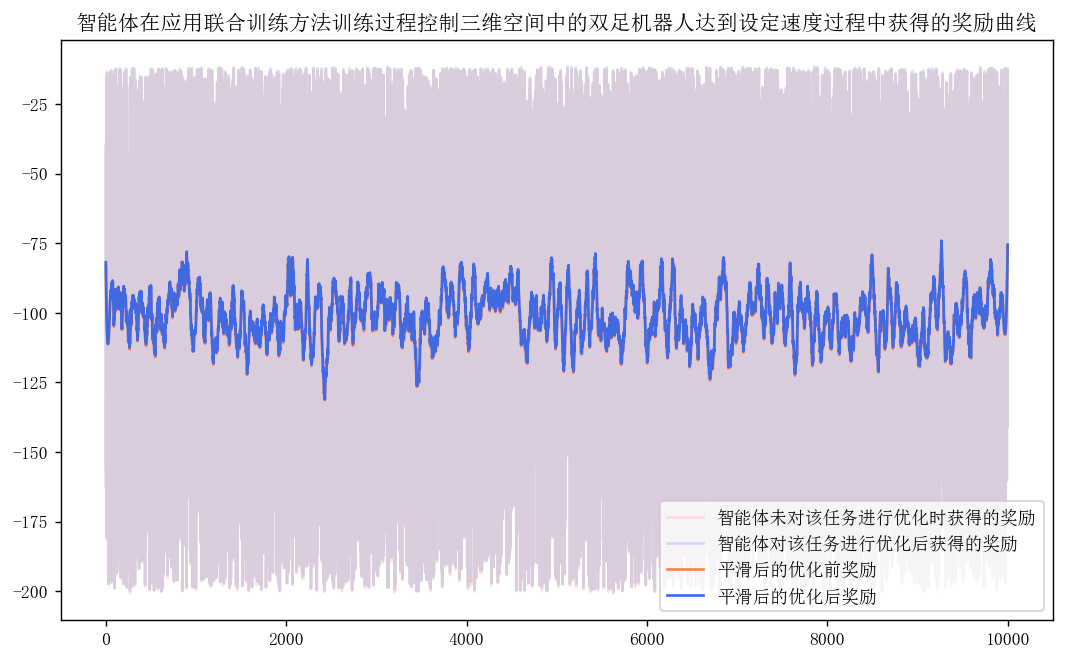

In [12]:
joint_result = np.load('joint-train.npz')
print (len(joint_result['train_returns']))

joint_train_returns = []
joint_valid_returns = []

for i in range(10000):
    joint_train_returns.append(np.mean(joint_result['train_returns'][i]))
    joint_valid_returns.append(np.mean(joint_result['valid_returns'][i]))

smooth_jt_tra_returns = smooth(joint_train_returns)
smooth_jt_val_returns = smooth(joint_valid_returns)
    
fig = plt.figure(dpi=128, figsize=(10,6))
plt.title('智能体在应用联合训练方法训练过程控制三维空间中的双足机器人达到设定速度过程中获得的奖励曲线')
plt.plot(joint_train_returns, alpha=0.2, color='coral', label='智能体未对该任务进行优化时获得的奖励')
plt.plot(joint_valid_returns, alpha=0.2, color='royalblue',label='智能体对该任务进行优化后获得的奖励')
plt.plot(smooth_jt_tra_returns, color='coral', label='平滑后的优化前奖励')
plt.plot(smooth_jt_val_returns, color='royalblue', label='平滑后的优化后奖励')
plt.legend(loc='lower right')
plt.savefig('joint-train-process-rewards.jpg')
plt.show()

img = Image.open('joint-train-process-rewards.jpg')
img.save('joint-train-process-rewards.eps')


['tasks', 'train_returns', 'valid_returns', 'train_speeds', 'valid_speeds', 'train_rewards', 'valid_rewards', 'train_tasks', 'valid_tasks', 'joint_train_returns', 'joint_valid_returns', 'joint_train_speeds', 'joint_valid_speeds', 'joint_train_rewards', 'joint_valid_rewards', 'joint_train_tasks', 'joint_valid_tasks']


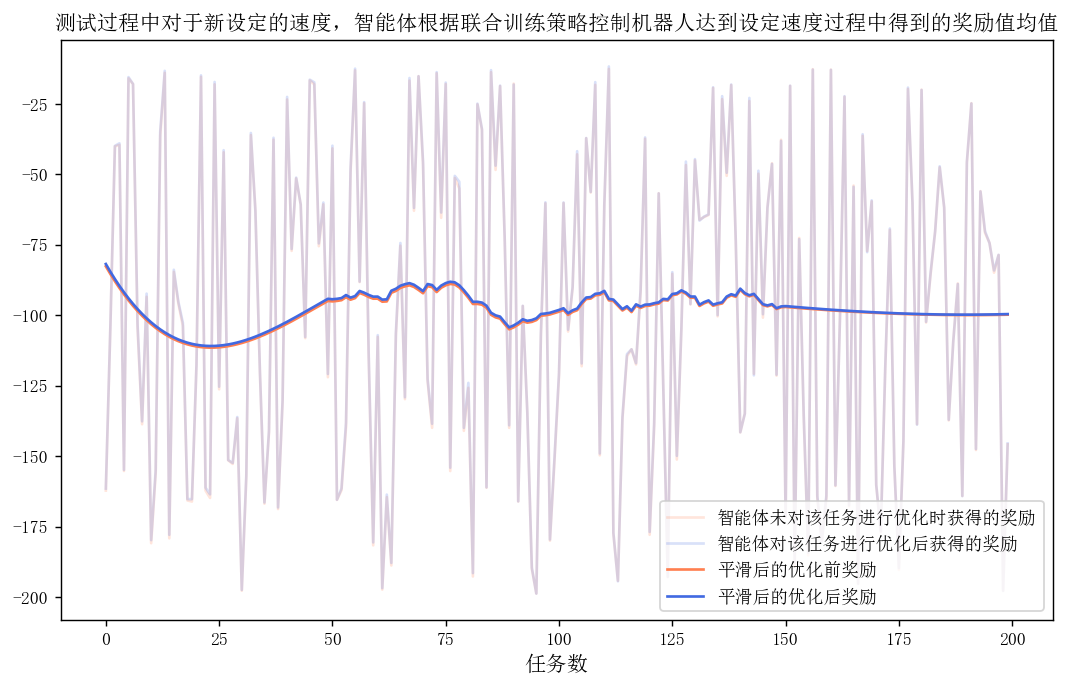

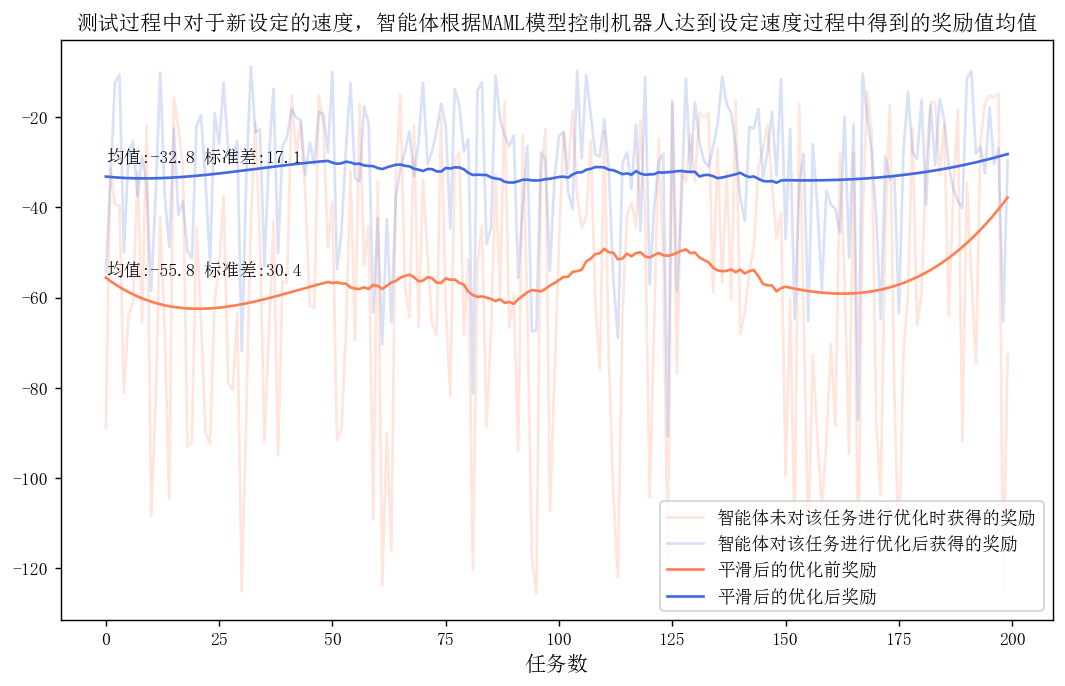

In [19]:
# load test result
result = np.load('results.npz')
print (result.files)


test_joint_rewards_before = result['joint_train_returns']
test_joint_rewards_after = result['joint_valid_returns']

test_joint_reward_before = []
test_joint_reward_after = []
for i in range(200):
    test_jt_tra_return = np.sum(test_joint_rewards_before[i])
    test_joint_reward_before.append(test_jt_tra_return/20)
    
    test_jt_val_return = np.sum(test_joint_rewards_after[i])
    test_joint_reward_after.append(test_jt_val_return/20)
    

test_rewards_before = result['train_returns']
test_rewards_after = result['valid_returns']

test_reward_before = []
test_reward_after = []
for i in range(200):
    test_tra_return = np.sum(test_rewards_before[i])
    test_reward_before.append(test_tra_return/20)
    
    test_val_return = np.sum(test_rewards_after[i])
    test_reward_after.append(test_val_return/20)
    
smooth_test_bef = smooth(test_reward_before)
smooth_test_aft = smooth(test_reward_after)

smooth_jt_test_bef = smooth(test_joint_reward_before)
smooth_jt_test_aft = smooth(test_joint_reward_after)


# @TODO
# 小数点后保留两位小数

fig = plt.figure(dpi=128, figsize=(10,6))
plt.title('测试过程中对于新设定的速度，智能体根据联合训练策略控制机器人达到设定速度过程中得到的奖励值均值')
plt.plot(test_joint_reward_before, alpha=0.2, color='coral', label='智能体未对该任务进行优化时获得的奖励')
plt.plot(test_joint_reward_after, alpha=0.2, color='royalblue',label='智能体对该任务进行优化后获得的奖励')
plt.plot(smooth_jt_test_bef, color='coral', label='平滑后的优化前奖励')
plt.plot(smooth_jt_test_aft, color='royalblue', label='平滑后的优化后奖励')
plt.xlabel('任务数', fontsize=12)
plt.legend(loc='lower right')
plt.savefig('test-process-rewards_joint.jpg')
plt.show()

img = Image.open('test-process-rewards_joint.jpg')
img.save('test-process-rewards_joint.eps')
    

fig = plt.figure(dpi=128, figsize=(10,6))
plt.title('测试过程中对于新设定的速度，智能体根据MAML模型控制机器人达到设定速度过程中得到的奖励值均值')
plt.plot(test_reward_before, alpha=0.2, color='coral', label='智能体未对该任务进行优化时获得的奖励')
plt.plot(test_reward_after, alpha=0.2, color='royalblue',label='智能体对该任务进行优化后获得的奖励')
plt.plot(smooth_test_bef, color='coral', label='平滑后的优化前奖励')
plt.plot(smooth_test_aft, color='royalblue', label='平滑后的优化后奖励')
plt.text(0, -55, "均值:{} 标准差:{}".format(-55.8, 30.4, '.2f'), size = 10, alpha = 1, wrap=True)
plt.text(0, -30, "均值:{} 标准差:{}".format(-32.8, 17.1, '.2f'), size = 10, alpha = 1, wrap=True)
plt.xlabel('任务数', fontsize=12)
plt.legend(loc='lower right')
plt.savefig('test-process-rewards.jpg')
plt.show()

img = Image.open('test-process-rewards.jpg')
img.save('test-process-rewards.eps')

test_speed_before = result['train_speeds']
test_speed_after = result['valid_speeds']
test_tra_rewards = result['train_rewards']
test_val_rewards = result['valid_rewards']
train_tasks = result['train_tasks']
test_tasks = result['valid_tasks']

test_jt_speed_before = result['joint_train_speeds']
test_jt_speed_after = result['joint_valid_speeds']
test_jt_tra_rewards = result['joint_train_rewards']
test_jt_val_rewards = result['joint_valid_rewards']


    
index = [0, 25, 88, 100, 125, 150, 188, 199]

# for idx in index:
#     fig = plt.figure(dpi=128, figsize=(10,6))
#     plt.title('测试过程中优化前后的策略对于双足机器人速度的控制曲线对比')
#     plt.plot(train_tasks[idx], color='black', label='目标速度: {}'.format(train_tasks[idx][0],'.2f'))
#     plt.plot(test_speed_before[idx],color='seagreen', linestyle='dashed', label='MAML模型经过1次梯度优化前的策略')
#     plt.plot(test_speed_after[idx], color='coral', label='MAML模型经过1次梯度优化后的策略')
#     plt.plot(test_tra_rewards[idx], color='red', linestyle='dashed',label='MAML模型经过1次梯度优化前策略得到的奖励')
#     plt.plot(test_val_rewards[idx], color='indigo', label='MAML模型经过1次梯度优化后策略得到的奖励')

#     plt.legend(loc='lower right')
#     plt.savefig('test_{}.png'.format(idx))
#     #plt.show()
    
# for idx in index:
#     fig = plt.figure(dpi=128, figsize=(10,6))
#     plt.title('测试过程中优化前后的策略对于双足机器人速度的控制曲线对比')
#     plt.plot(train_tasks[idx], color='black', label='目标速度: {}'.format(train_tasks[idx][0],'.2f'))
#     plt.plot(test_jt_speed_before[idx],color='seagreen', linestyle='dashed', label='联合训练策略经过1次梯度优化前的策略')
#     plt.plot(test_jt_speed_after[idx], color='coral', label='联合训练策略经过1次梯度优化后的策略')
#     plt.plot(test_tra_rewards[idx], color='red', linestyle='dashed',label='联合训练模型经过1次梯度优化前策略得到的奖励')
#     plt.plot(test_val_rewards[idx], color='indigo', label='联合训练模型经过1次梯度优化后策略得到的奖励')
#     plt.legend(loc='lower right')
#     plt.savefig('test_joint_{}.png'.format(idx))

img = Image.open('joint-rl-test.png')
img=img.convert('RGB')
img.save('joint-rl-test.jpg')
img = Image.open('joint-rl-test.jpg')
img.save('joint-rl-test.eps')

img = Image.open('maml-rl-test.png')
img=img.convert('RGB')
img.save('maml-rl-test.jpg')
img = Image.open('maml-rl-test.jpg')
img.save('maml-rl-test.eps')
